In [13]:
#!pip install pandas transformers simpletransformers==0.41 amp

  Using cached simpletransformers-0.41.0-py3-none-any.whl (191 kB)
  Using cached AMP-1.1.4-py3-none-any.whl
  Using cached tokenizers-0.7.0.tar.gz (81 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached tensorboardX-2.5.1-py2.py3-none-any.whl (125 kB)
  Using cached transformers-4.20.1-py3-none-any.whl (4.4 MB)
  Using cached transformers-4.20.0-py3-none-any.whl (4.4 MB)
  Using cached transformers-4.19.4-py3-none-any.whl (4.2 MB)
  Using cached transformers-4.19.3-py3-none-any.whl (4.2 MB)
  Using cached transformers-4.19.2-py3-none-any.whl (4.2 MB)
  Using cached transformers-4.19.1-py3-none-any.whl (4.2 MB)
  Using cached transformers-4.19.0-py3-none-any.whl (4.2 MB)
  Using cached transformers-4.18.0-py3-no

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\akhil\anaconda3\python.exe' 'C:\Users\akhil\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\akhil\AppData\Local\Temp\tmpc2saaf_8'
       cwd: C:\Users\akhil\AppData\Local\Temp\pip-install-q2sdafgj\tokenizers_2b4645c8c6c74bb383d789537df9ff56
  Complete output (46 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\tokenizers
  copying tokenizers\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers
  creating build\lib.win-amd64-cpython-39\tokenizers\models
  copying tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers\models
  creating build\lib.win-amd64-cpython-39\tokenizers\decoders
  copying tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers\decoders
  creating build\lib.win-amd64-cpython-39\tokenizers\


  Using cached transformers-4.16.1-py3-none-any.whl (3.5 MB)
  Using cached transformers-4.16.0-py3-none-any.whl (3.5 MB)
  Using cached transformers-4.15.0-py3-none-any.whl (3.4 MB)
  Using cached transformers-4.14.1-py3-none-any.whl (3.4 MB)
  Using cached transformers-4.13.0-py3-none-any.whl (3.3 MB)
  Using cached transformers-4.12.5-py3-none-any.whl (3.1 MB)
  Using cached transformers-4.12.4-py3-none-any.whl (3.1 MB)
  Using cached transformers-4.12.3-py3-none-any.whl (3.1 MB)
  Using cached transformers-4.12.2-py3-none-any.whl (3.1 MB)
  Using cached transformers-4.12.1-py3-none-any.whl (3.1 MB)
  Using cached transformers-4.12.0-py3-none-any.whl (3.1 MB)
  Using cached transformers-4.11.3-py3-none-any.whl (2.9 MB)
  Using cached transformers-4.11.2-py3-none-any.whl (2.9 MB)
  Using cached transformers-4.11.1-py3-none-any.whl (2.9 MB)
  Using cached transformers-4.11.0-py3-none-any.whl (2.9 MB)
  Using cached transformers-4.10.3-py3-none-any.whl (2.8 MB)
  Using cached transfor

      pip install --upgrade pip
  
  and then retry package installation.
  
  If you did intend to build this package from source, try installing a Rust compiler from your system package manager and ensure it is on the PATH during installation. Alternatively, rustup (available at https://rustup.rs) is the recommended way to download and update the Rust compiler toolchain.
  ----------------------------------------
  ERROR: Failed building wheel for tokenizers
ERROR: Could not build wheels for tokenizers which use PEP 517 and cannot be installed directly


In [1]:
from DataHandler import DataHandler

csvTrainDataset ="train.csv"
csvValDataset = "validation.csv"
csvTestDataset = "test.csv"

#bertDir = projectDir+"/data/encoded/bert"
dh = DataHandler()
dfTrain = dh.readCSVData(csvTrainDataset)
dfVal = dh.readCSVData(csvValDataset)
dfTest = dh.readCSVData(csvTestDataset)

In [2]:
# Select interesting columns for this study.
dfTrainDataset = dfTrain[["screen_name", "text", "account.type"]]
dfValDataset = dfVal[["screen_name", "text", "account.type"]]
dfTestDataset = dfTest[["screen_name", "text", "account.type"]]

In [3]:
dfTrainDataset

,screen_name,text,account.type
0,imranyebot,YEA now that note GOOD,bot
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human
2,zawarbot,wish i can i would be seeing other hoes on the...,bot
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot
...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot
20708,AINarendraModi,Land for their during the opportunity to the p...,bot
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human


In [4]:
X_train_all = dfTrainDataset.drop(columns=['screen_name'])
X_train_all.columns = ["text", "label"]

X_val_all = dfValDataset.drop(columns=['screen_name'])
X_val_all.columns = ["text", "label"]

X_test_all = dfTestDataset.drop(columns=['screen_name'])
X_test_all.columns = ["text", "label"]

dictLabels = {"human":0, "bot":1}
dictLabelsReverse = {0:"human", 1: "bot"}

X_train_all["label"] = X_train_all["label"].apply(lambda x: dictLabels[x])
X_val_all["label"] = X_val_all["label"].apply(lambda x: dictLabels[x])
X_test_all["label"] = X_test_all["label"].apply(lambda x: dictLabels[x])
y_train = X_train_all["label"]
y_val = X_val_all["label"]
y_test = X_test_all["label"]

In [5]:
train_labels = y_train.tolist()
val_labels = y_val.tolist()
test_labels = y_test.tolist()

In [6]:
from simpletransformers.classification import ClassificationModel

#Create a ClassificationModel
#model = ClassificationModel('bert', 'bert-base-cased', args={'fp16': False, 'num_train_epochs': 3, "overwrite_output_dir":True}) #You can set class weights by using the optional weight argument

# Train the model
#model.train_model(X_train_all)

In [7]:
#model

In [8]:
import torch
from simpletransformers.classification import ClassificationModel

In [11]:
#torch.save(model,"bert_base.pt")

In [31]:
#model = torch.load("bert_base.pt")


In [9]:
result=torch.load("BERT_base_result_col.pt")


In [10]:
predictions=torch.load("Deep_pred_col.pt")

In [11]:
#result = torch.load("Deep_BERT_result.pt")

In [12]:
result

{'mcc': 0.783451937865448,
 'tp': 1147,
 'tn': 1134,
 'fp': 144,
 'fn': 133,
 'acc': 0.8917122752150117,
 'f1': 0.8922598210812913,
 'eval_loss': 0.6043054708375621}

In [ ]:
# Evaluate the model
#import sklearn
#result, model_outputs, wrong_predictions = model.eval_model(X_test_all, acc=sklearn.metrics.accuracy_score, f1=sklearn.metrics.f1_score)

C:\Users\akhil\anaconda3\lib\site-packages\simpletransformers\classification\classification_model.py:1442: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2558 [00:00<?, ?it/s]

In [20]:
result

{'mcc': 0.7865627304409757,
 'tp': 1147,
 'tn': 1138,
 'fp': 140,
 'fn': 133,
 'acc': 0.8932759968725567,
 'f1': 0.8936501753019089,
 'eval_loss': 0.5398737004163194}

In [12]:
#torch.save(result,"BERT_base_result_col.pt")

In [13]:
X_test_all

,text,label
0,justin timberlake really one of the goats if y...,0
1,Thank you @PMBhutan for your gracious prayers ...,0
2,Theory: the number of red lights you will hit ...,0
3,Respects on the Upt of the I good with the peo...,1
4,Might give the BASIC #10Liner game contest ano...,0
...,...,...
2553,“The best kept secret,1
2554,Love the Choose your own adventure style of th...,0
2555,JOIN OUR TEAM: Sneezing,1
2556,These deeply discounted 256GB SanDisk flash dr...,0


In [14]:
#X_test_all["text"]

In [15]:
#X_test_all.dtypes

In [16]:
#predictions = model.predict(X_test_all["text"])[0]

In [17]:
#torch.save(predictions,"Deep_pred_col.pt")

In [18]:
import pandas as pd

predictionLabels = [dictLabelsReverse[t] for t in predictions]
dfResults = pd.DataFrame(predictionLabels, columns=["prediction"])
dfResults["orginal"] = dfTest[["account.type"]]
file_name = "distillbert_finetuning_new.csv"
dfResults.to_csv(file_name, sep='\t', encoding='utf-8')

In [19]:
dfResults

,prediction,orginal
0,human,human
1,human,human
2,human,human
3,bot,bot
4,human,human
...,...,...
2553,bot,bot
2554,human,human
2555,bot,bot
2556,human,human


In [20]:
dfTest["label_distillbert"] = [dictLabelsReverse[t] for t in predictions]

In [21]:
def plotErrorRatio(X_test_all, prediction_column, min_sample_num=30):
  X_verify = X_test_all[["screen_name", "text", "account.type", prediction_column]]
  X_count_accounts = X_test_all[["screen_name", "account.type"]].groupby("screen_name").count()
  X_verify = X_verify[X_verify["account.type"] != X_verify[prediction_column]]
  X_verify = X_verify.groupby("screen_name").count()["text"].to_frame()
  X_verify["total"] = X_count_accounts["account.type"]
  X_verify.columns = ["errors", "num_samples"]
  X_verify["error_ratio"] = X_verify["errors"] / X_verify["num_samples"]
  X_verify[X_verify["num_samples"] >= min_sample_num]["error_ratio"].plot.bar(figsize=(15,5))
  return X_verify

,errors,num_samples,error_ratio
screen_name,,,
DeepDrumpf,2,29,0.068966
DrilRnn,1,1,1.000000
GenePark,1,22,0.045455
GenePark_GPT2,6,22,0.272727
Gpt2Wint,1,2,0.500000
Thorin,2,10,0.200000
UtilityLimb,3,4,0.750000
ahadsheriff,13,95,0.136842
ahadsheriffbot,5,95,0.052632


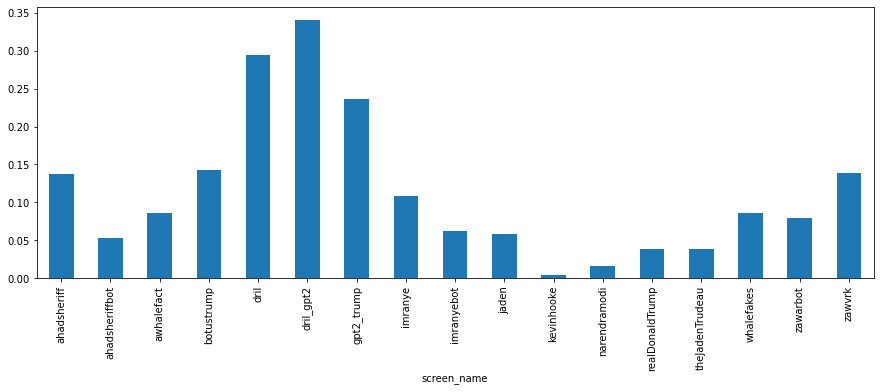

In [22]:
plotErrorRatio(dfTest, "label_distillbert")

In [19]:
X_test_all["text"]

0       justin timberlake really one of the goats if y...
1       Thank you @PMBhutan for your gracious prayers ...
2       Theory: the number of red lights you will hit ...
3       Respects on the Upt of the I good with the peo...
4       Might give the BASIC #10Liner game contest ano...
                              ...                        
2553                                “The best kept secret
2554    Love the Choose your own adventure style of th...
2555                              JOIN OUR TEAM: Sneezing
2556    These deeply discounted 256GB SanDisk flash dr...
2557    @deleonfc6 diamond pearl and platinum were hon...
Name: text, Length: 2558, dtype: object



confusion matrix


[[1138  140]
 [ 133 1147]]




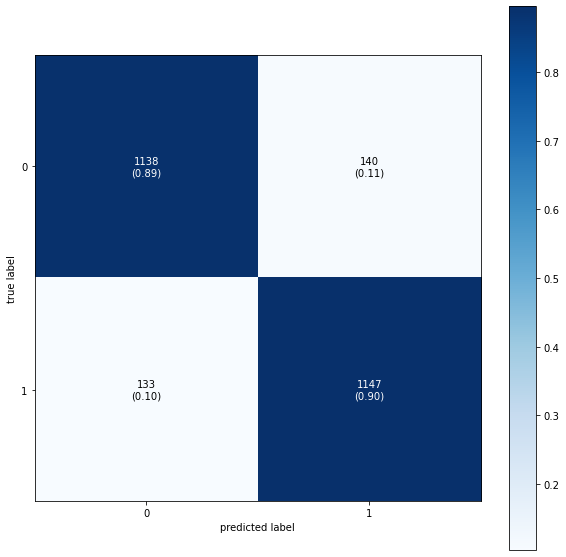

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(X_test_all['label'],predictions)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [33]:
#!pip install gradio

In [20]:
import gradio as gr

In [35]:
#!pip install anyio==3.5.0


In [36]:
#!pip install starlette

In [37]:
#!pip install sunpy

In [38]:
#Interface

In [21]:
dfTestDatasetnew=dfTestDataset

In [22]:
dfTestDatasetnew.head()

,screen_name,text,account.type
0,zawvrk,justin timberlake really one of the goats if y...,human
1,narendramodi,Thank you @PMBhutan for your gracious prayers ...,human
2,ahadsheriff,Theory: the number of red lights you will hit ...,human
3,AINarendraModi,Respects on the Upt of the I good with the peo...,bot
4,kevinhooke,Might give the BASIC #10Liner game contest ano...,human


In [23]:
#Merge for ui use

In [24]:
merge = pd.concat([dfTestDatasetnew,dfResults], axis=1, join='inner')

In [25]:
merge=merge.drop_duplicates(subset='screen_name')

In [26]:
merge

,screen_name,text,account.type,prediction,orginal
0,zawvrk,justin timberlake really one of the goats if y...,human,human,human
1,narendramodi,Thank you @PMBhutan for your gracious prayers ...,human,human,human
2,ahadsheriff,Theory: the number of red lights you will hit ...,human,human,human
3,AINarendraModi,Respects on the Upt of the I good with the peo...,bot,bot,bot
4,kevinhooke,Might give the BASIC #10Liner game contest ano...,human,human,human
5,imranyebot,Fifty Four Degrees sent it was,bot,bot,bot
6,DeepDrumpf,"Kansas They all said, “I don’t need anything. ...",bot,bot,bot
7,jaden,I Wanna See Some Rainbows Out There Boys,human,human,human
8,dril,"ive been known to look at 2, even 3 emails , a...",human,bot,human
11,dril_gpt2,"there is a ""war on cows"" going on right now, b...",bot,human,bot


In [27]:
import numpy as np

import gradio as gr
def test_1(Account_Name):
    number=dfTestDatasetnew[dfTestDatasetnew["screen_name"]==Account_Name].index
    index=number[0]
    return dfResults.iloc[[index]]
    
  
gr.Interface(fn=test_1, 
             inputs="text", 
             outputs="text"
            ).launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x14e338067c0>, 'http://127.0.0.1:7860/', None)

In [47]:
############INTERFACE #####################

In [48]:
pip install tkinder

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tkinder (from versions: none)
ERROR: No matching distribution found for tkinder


In [49]:
from tkinter import *


In [59]:
root=Tk()
e=Entry(root,width=100)
e.pack()
def myclick():
    if(e.get()==merge["screen_name"].get()):
        myLabel=Label(root,text="hai")
    else:
        myLabel=Label(root,text="no hai")
        

    myLabel=Label(root,text=c.get())
    myLabel.pack()
myButton=Button(root,text="Check",command=myclick)
myButton.pack()
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\akhil\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\akhil\AppData\Local\Temp/ipykernel_11100/2899595293.py", line 5, in myclick
    if(e.get()==merge["screen_name"].get()):
TypeError: get() missing 1 required positional argument: 'key'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\akhil\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\akhil\AppData\Local\Temp/ipykernel_11100/2899595293.py", line 5, in myclick
    if(e.get()==merge["screen_name"].get()):
TypeError: get() missing 1 required positional argument: 'key'
